In [70]:
from utils.recorder import Recorder
from sorting.merge_sort import merge_sort
from sorting.merge_sort_iterative import merge_sort_iter
from sorting.quick_sort import quick_sort
from sorting.quick_sort_3way import quick_sort_3way
from sorting.selection_sort import selection_sort
from sorting.insertion_sort import insert_sort_optimized
from sorting.insertion_sort import insert_sort
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
from threading import Thread

recorder = Recorder()
start, end = 1000, 10000

for x in range(start,end, 500):
    data = list(np.random.randint(x, size=(x,1)))

    p1 = Thread(target=recorder.execute, args=(selection_sort, data))
    p2 = Thread(target=recorder.execute, args=(insert_sort, data))

    p3 = Thread(target=recorder.execute, args=(insert_sort_optimized, data))
    p4 = Thread(target=recorder.execute, args=(merge_sort, data, [0, len(data)-1]))
    p5 = Thread(target=recorder.execute, args=(merge_sort_iter, data))
    p6 = Thread(target=recorder.execute, args=(quick_sort, data, [0, len(data)-1]))
    p7 = Thread(target=recorder.execute, args=(quick_sort_3way, data, [0, len(data)-1]))

    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    p6.start()
    p7.start()

    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()
    p6.join()
    p7.join()

In [72]:
import pandas as pd

total_result = {}
record = recorder.get_record()

for k, v in record.items():
    total_result[k] = v['sec']


df = pd.DataFrame.from_dict(total_result)
index = [f'{i}' for i in range(start, end, 500)]
df.index = index
df


,selection_sort,insert_sort,insert_sort_optimized,merge_sort,merge_sort_iter,quick_sort,quick_sort_3way
1000,0.611995,0.510003,0.408000,0.008000,0.293999,0.008000,0.013002
1500,1.360004,1.000999,0.884003,0.012000,0.891037,0.013000,0.148000
2000,2.348004,1.810000,1.636008,0.015000,1.829005,0.034001,0.045999
2500,3.695998,2.944001,2.525986,0.037986,3.171001,0.053001,0.090000
3000,5.192000,4.137013,3.973012,0.103999,3.882999,0.137998,0.126997
3500,7.004107,5.355096,4.761095,0.059999,5.254095,0.128001,0.117000
4000,9.324000,7.217000,6.483001,0.097001,7.187999,0.148998,0.268000
4500,11.627000,9.110000,8.422998,0.103000,9.071001,0.167000,0.324999
5000,14.521999,11.267001,10.634990,0.106987,11.383001,0.109013,0.346000
5500,17.577189,13.804000,12.888002,0.095998,14.229000,0.200999,0.602003


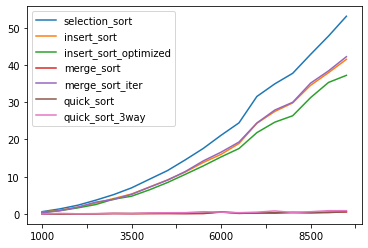

In [73]:
import matplotlib.pyplot as plt

df.plot()
plt.show()